## 机器学习 - 神经网络

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import scipy.io as sio
import scipy.optimize as opt

In [2]:
def load_data(path,transpose=True):
    data = sio.loadmat(path)
    y = data.get('y')  # (5000,1)
    y = y.reshape(y.shape[0])  # make it back to column vector

    X = data.get('X')  # (5000,400)

    if transpose:
        # for this dataset, you need a transpose to get the orientation right
        X = np.array([im.reshape((20, 20)).T for im in X])

        # and I flat the image again to preserve the vector presentation
        X = np.array([im.reshape(400) for im in X])

    return X, y

In [4]:
data = sio.loadmat('ex3data1.mat')

In [40]:
data.get('y').shape

(5000, 1)

In [56]:
t = np.linspace(1,16,16) # 等差数列：开始值，结束值，个数
tt = t.reshape(4,4)
tt

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12.],
       [13., 14., 15., 16.]])

In [59]:
ttt = tt.T
ttt

array([[ 1.,  5.,  9., 13.],
       [ 2.,  6., 10., 14.],
       [ 3.,  7., 11., 15.],
       [ 4.,  8., 12., 16.]])

In [60]:
tttt = ttt.reshape(16)
tttt

array([ 1.,  5.,  9., 13.,  2.,  6., 10., 14.,  3.,  7., 11., 15.,  4.,
        8., 12., 16.])

In [6]:
data['y']

array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)

In [41]:
data['X'][1]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  3.22856793e-04, -9.15576210e-04, -2.53532265e-02,
       -3.85931128e-02, -

In [17]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [30]:
for k,v in data.items():
    print('{}:{}'.format(k,v))

__header__0:0b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011'
__version__0:01.0
__globals__0:0[]
X0:0[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
y0:0[[10]
 [10]
 [10]
 ...
 [ 9]
 [ 9]
 [ 9]]


In [73]:
X,y = load_data('ex3data1.mat')

In [61]:
X[1]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  3.31857514e-18,  4.30623638e-04,
       -6.68558830e-03, -2.18887868e-02, -9.33091639e-03,  3.84497549e-04,
        3.21691176e-05,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  9.78353920e-04, -1.41265134e-02,
        2.27848153e-02,  

In [65]:
def plot_an_image(image):
    fig,ax = plt.subplots(figsize=(1,1))
    ax.matshow(image.reshape((20, 20)), cmap=matplotlib.cm.binary)
    plt.xticks(np.array([]))  # just get rid of ticks
    plt.yticks(np.array([]))

`matshow`:plot a matrix or an array as an image

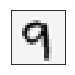

this should be 9


In [75]:
pick_one = np.random.randint(0,5000)
plot_an_image(X[pick_one])
plt.show()
print('this should be {}'.format(y[pick_one]))

In [76]:
def plot_100_image(X):
    """ sample 100 image and show them
    assume the image is square

    X : (5000, 400)
    """
    size = int(np.sqrt(X.shape[1]))

    # sample 100 image, reshape, reorg it
    sample_idx = np.random.choice(np.arange(X.shape[0]), 100)  # 100*400
    sample_images = X[sample_idx, :]

    fig, ax_array = plt.subplots(nrows=10, ncols=10, sharey=True, sharex=True, figsize=(8, 8))

    for r in range(10):
        for c in range(10):
            ax_array[r, c].matshow(sample_images[10 * r + c].reshape((size, size)),
                                   cmap=matplotlib.cm.binary)
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))  
            #绘图函数，画100张图片

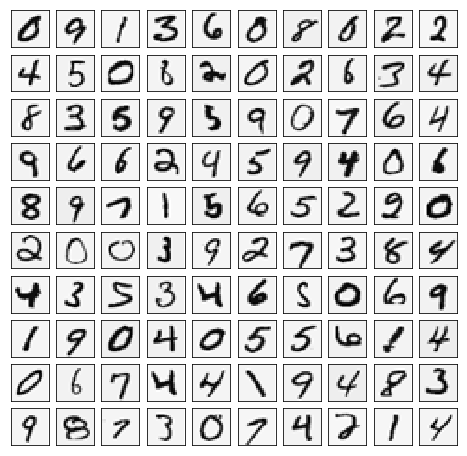

In [77]:
plot_100_image(X)
plt.show()

In [78]:
raw_X, raw_y = load_data('ex3data1.mat')
print(raw_X.shape)
print(raw_y.shape)

(5000, 400)
(5000,)


## 准备数据

In [83]:
X = np.insert(raw_X,0,values = np.ones(raw_X.shape[0]),axis=1) ##插入了第一列（全部为1）
X.shape

(5000, 401)

In [84]:
raw_y

array([10, 10, 10, ...,  9,  9,  9], dtype=uint8)

In [85]:
raw_y.shape

(5000,)

In [86]:
raw_X.shape

(5000, 400)

In [87]:
y_matrix = []
for k in range(1, 11):
    y_matrix.append((raw_y == k).astype(int))
y_matrix = [y_matrix[-1]] + y_matrix[:-1]
y = np.array(y_matrix)

In [88]:
y.shape

(10, 5000)

In [89]:
y

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 1]])

## 训练一维模型

In [99]:
def cost(theta, X, y):
    ''' cost fn is -l(theta) for you to minimize'''
    return np.mean(-y * np.log(sigmoid(X @ theta)) - (1 - y) * np.log(1 - sigmoid(X @ theta)))

@ 在numpy中可以代替`matmul` 实现矩阵相乘

In [90]:
def regularized_cost(theta, X, y, l=1): #代价函数的正则化
    '''you don't penalize theta_0'''
    theta_j1_to_n = theta[1:]
    regularized_term = (l / (2 * len(X))) * np.power(theta_j1_to_n, 2).sum()

    return cost(theta, X, y) + regularized_term

In [91]:
def regularized_gradient(theta, X, y, l=1): #梯度函数的正则化
    '''still, leave theta_0 alone'''
    theta_j1_to_n = theta[1:]
    regularized_theta = (l / len(X)) * theta_j1_to_n

    # by doing this, no offset is on theta_0
    regularized_term = np.concatenate([np.array([0]), regularized_theta])

    return gradient(theta, X, y) + regularized_term

In [92]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [93]:
def gradient(theta, X, y):
    '''just 1 batch gradient'''
    return (1 / len(X)) * X.T @ (sigmoid(X @ theta) - y)

In [94]:
def logistic_regression(X, y, l=1):
    """generalized logistic regression
    args:
        X: feature matrix, (m, n+1) # with incercept x0=1
        y: target vector, (m, )
        l: lambda constant for regularization

    return: trained parameters
    """
    # init theta
    theta = np.zeros(X.shape[1])

    # train it
    res = opt.minimize(fun=regularized_cost,
                       x0=theta,
                       args=(X, y, l),
                       method='TNC',
                       jac=regularized_gradient,
                       options={'disp': True})
    # get trained parameters
    final_theta = res.x

    return final_theta

> scipy.optimize 提供了许多数值优化算法：
> 1. 最小二乘拟合 opt.leastsq()
> 2. 局部最小值 opt.minimize(target_fun,init_val,method,jac,hess)
> 3. 全局最小值 opt.basinhopping()

In [95]:
def predict(x, theta):
    prob = sigmoid(x @ theta)
    return (prob >= 0.5).astype(int)

In [100]:
t0 = logistic_regression(X, y[0])

In [102]:
t0.shape

(401,)

In [103]:
y_pred = predict(X, t0)
print('Accuracy={}'.format(np.mean(y[0] == y_pred)))

Accuracy=0.9974
